# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [58]:
# =============================================
# 1) Importação das bibliotecas necessárias
# =============================================
import pandas as pd    # Para manipulação de dados (tabelas)
import matplotlib.pyplot as plt
import seaborn as sns            # Biblioteca de visualização mais bonita

# =============================================
# 2) Carregar o dataset Titanic
# =============================================
# Le  o arquivo Titanic.csv e guarda em uma tabela
df = pd.read_csv("Titanic.csv")

# Exibe as 5 primeiras linhas para entender a estrutura dos dados
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# Mostra informações gerais do DataFrame:
# - Nome e tipo das colunas
# - Quantidade de valores não nulos
# - Número total de linhas
print(df.info())

# Mostra estatísticas descritivas das colunas numéricas:
# - count = quantidade de valores não nulos
# - mean = média
# - std = desvio padrão
# - min, max = valores mínimo e máximo
# - 25%, 50%, 75% = quartis (distribuição dos dados)
print(df.describe())

# Conta quantos passageiros do sexo masculino e feminino existem na base
print(df['Sex'].value_counts())

# Conta quantos passageiros embarcaram em cada porto:
# S = Southampton, C = Cherbourg, Q = Queenstown
print(df['Embarked'].value_counts())

# Verifica a quantidade de valores nulos (faltantes) em cada coluna
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [60]:
# Remove linhas duplicadas do DataFrame
df = df.drop_duplicates()

# Preenche valores faltantes na coluna 'Age' com a mediana da coluna
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Remove colunas que não são necessárias, ignorando as que não existem

df = df.drop(columns=['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Name'], errors='ignore')


# Converte a coluna 'Survived' para tipo booleano (True/False)
df['Survived'] = df['Survived'].astype(bool)

# Verifica se ainda existem valores faltantes no DataFrame
print(df.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64


In [61]:
def categorize_age(Age):
    if Age < 18: return 'Crianca'
    elif Age < 60: return 'Adulto'
    else: return 'Idoso'
df['faixa_etaria' ] = df['Age'].apply(categorize_age)
# Filtrando dados: Somente sobreviventes
survivors = df[df['Survived'] == 1]  # ou True, dependendo do tipo da coluna
print(survivors.head())

   Survived  Pclass     Sex   Age     Fare Embarked faixa_etaria
1      True       1  female  38.0  71.2833        C       Adulto
2      True       3  female  26.0   7.9250        S       Adulto
3      True       1  female  35.0  53.1000        S       Adulto
8      True       3  female  27.0  11.1333        S       Adulto
9      True       2  female  14.0  30.0708        C      Crianca


In [62]:
print(df.columns)



Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'faixa_etaria'], dtype='object')


In [63]:
# Agrupando e agregando: taxa de sobrevivência por classe e sexo
grouped = df.groupby(['Pclass', 'Sex']).agg({
    'Survived': 'mean',  # Média = taxa de sobrevivência
    'Age': 'mean',
    'Fare': 'median'
}).reset_index()

print(grouped)


# Ordenando por tarifa decrescente
print(df.sort_values(by='Fare',ascending=False).head())

   Pclass     Sex  Survived        Age      Fare
0       1  female  0.968085  33.978723  82.66455
1       1    male  0.368852  38.995246  41.26250
2       2  female  0.921053  28.703947  22.00000
3       2    male  0.157407  30.512315  13.00000
4       3  female  0.500000  23.572917  12.47500
5       3    male  0.135447  26.911873   7.92500
     Survived  Pclass     Sex   Age      Fare Embarked faixa_etaria
737      True       1    male  35.0  512.3292        C       Adulto
679      True       1    male  36.0  512.3292        C       Adulto
258      True       1  female  35.0  512.3292        C       Adulto
438     False       1    male  64.0  263.0000        S        Idoso
88       True       1  female  23.0  263.0000        S       Adulto


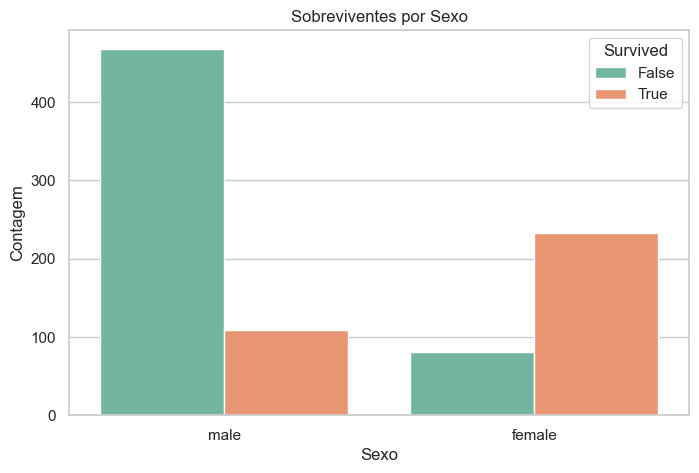

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Gráfico 1: Contagem de sobreviventes por sexo
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()


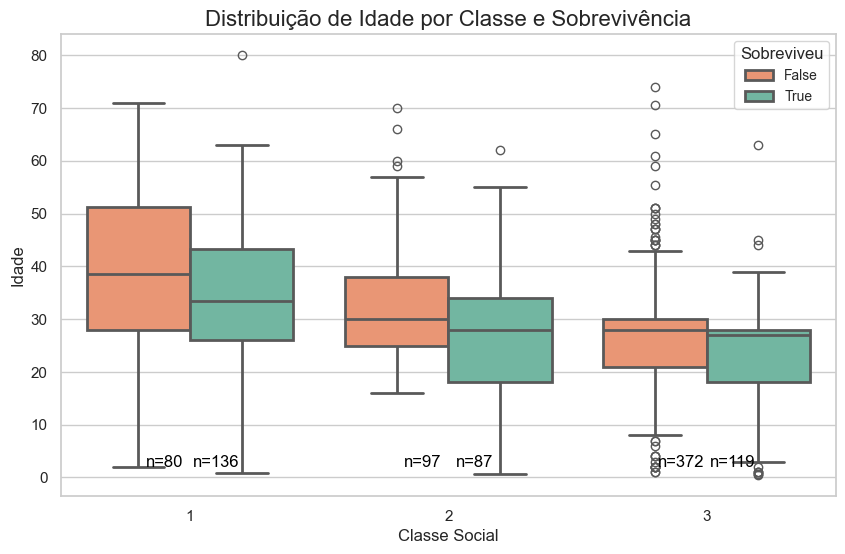

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Boxplot melhorado
sns.boxplot(
    data=df,
    x='Pclass',
    y='Age',
    hue='Survived',
    palette={True: '#66c2a5', False: '#fc8d62'},  # verde para sobreviventes, laranja para não
    linewidth=2
)

plt.title('Distribuição de Idade por Classe e Sobrevivência', fontsize=16)
plt.xlabel('Classe Social', fontsize=12)
plt.ylabel('Idade', fontsize=12)
plt.legend(title='Sobreviveu', fontsize=10, title_fontsize=12)

# Adicionando contagem de passageiros
from collections import Counter

for i, pclass in enumerate(sorted(df['Pclass'].unique())):
    for j, survived in enumerate([False, True]):
        count = len(df[(df['Pclass']==pclass) & (df['Survived']==survived)])
        plt.text(i + j*0.2 - 0.1, 2, f'n={count}', horizontalalignment='center', color='black')

plt.show()


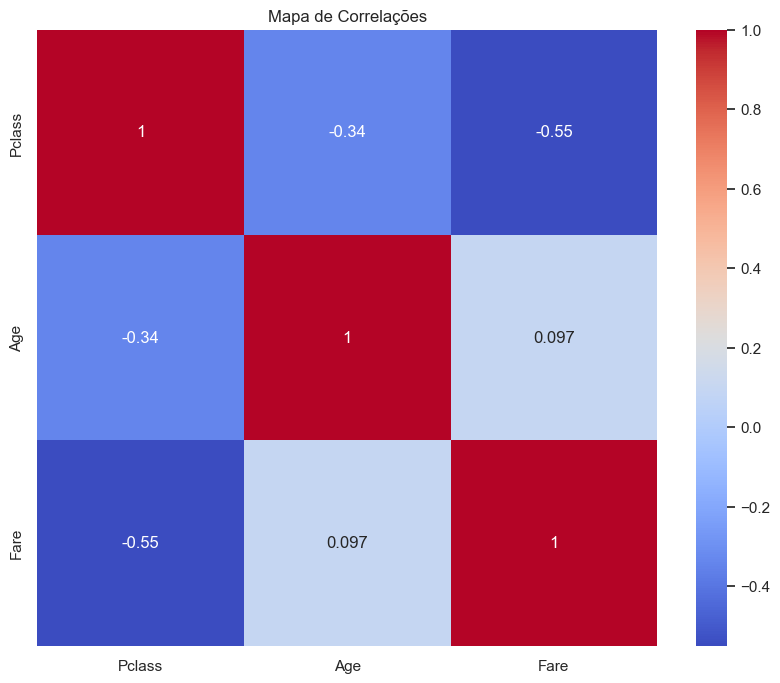

In [69]:
# Seleciona apenas colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcula a correlação
corr = numeric_df.corr()

# Gráfico de mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlações')
plt.show()

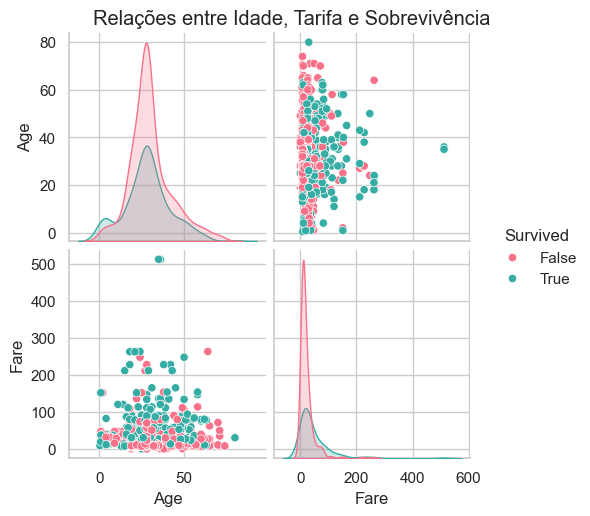

In [70]:
# Pairplot para relações múltiplas
sns.pairplot(
    df,
    vars=['Age', 'Fare'],
    hue='Survived',
    palette='husl'
)

plt.suptitle('Relações entre Idade, Tarifa e Sobrevivência', y=1.02)
plt.show()


A análise exploratória realizada nos dados do Titanic revelou relações importantes entre as variáveis do conjunto e a sobrevivência dos passageiros. Observou-se que a classe social e a tarifa paga foram fatores determinantes: passageiros que viajavam em classes mais altas e pagaram tarifas mais elevadas apresentaram maior probabilidade de sobrevivência.

Embora a idade não tenha mostrado uma correlação forte isoladamente, verificou-se que crianças pequenas tiveram uma chance ligeiramente maior de sobreviver, alinhando-se com as políticas de embarque prioritário para mulheres e crianças. Por outro lado, variáveis relacionadas à família, como número de irmãos/cônjuges (SibSp) e pais/filhos (Parch), apresentaram pouca influência direta sobre a sobrevivência.

De maneira geral, os resultados indicam que o acesso a recursos e a posição social foram mais relevantes para a sobrevivência do que fatores individuais como idade ou estrutura familiar. Esses insights podem ser utilizados como base para modelagem preditiva ou estudos adicionais sobre fatores de risco e sobrevivência em situações de emergência.